In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

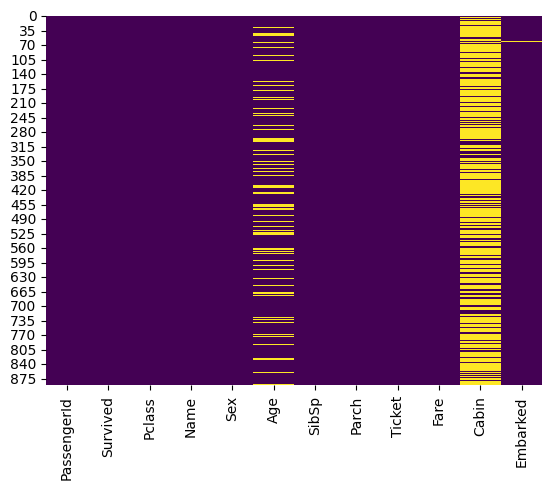

In [4]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)
if 'Sex' in df.columns:
    df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.565736      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.663861      1      0   
2                             Heikkinen, Miss. Laina -0.258337      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312      1      0   
4                           Allen, Mr. William Henry  0.433312      0      0   

             Ticket      Fare Cabin Embarked  Sex_male  
0         A/5 21171 -0.502445   NaN        S      True  
1          PC 17599  0.786845   C85        C     False  
2  STON/O2. 3101282 -0.488854   NaN        S     False  
3            113803  0.420730  C123        S     False  
4            3734

In [7]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
331,332,1,"Partner, Mr. Austen",1.240235,0,0,113043,-0.074583,C124,S,True
733,734,2,"Berriman, Mr. William John",-0.488887,0,0,28425,-0.386671,NaN,S,True
382,383,3,"Tikkanen, Mr. Juho",0.202762,0,0,STON/O 2. 3101293,-0.488854,NaN,S,True
704,705,3,"Hansen, Mr. Henrik Juul",-0.258337,1,0,350025,-0.490280,NaN,S,True
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",-1.795334,4,2,347082,-0.018709,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",-0.642586,0,0,343120,-0.494391,NaN,S,False
270,271,1,"Cairns, Mr. Alexander",-0.104637,0,0,113798,-0.024246,NaN,S,True
860,861,3,"Hansen, Mr. Claus Peter",0.894411,2,0,350026,-0.364355,NaN,S,True
435,436,1,"Carter, Miss. Lucile Polk",-1.180535,1,2,113760,1.767741,B96 B98,S,False


In [8]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [9]:

X_train.dropna(inplace=True)
y_train = y_train[X_train.index]

X_test.dropna(inplace=True)
y_test = y_test[X_test.index]


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 1.00
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



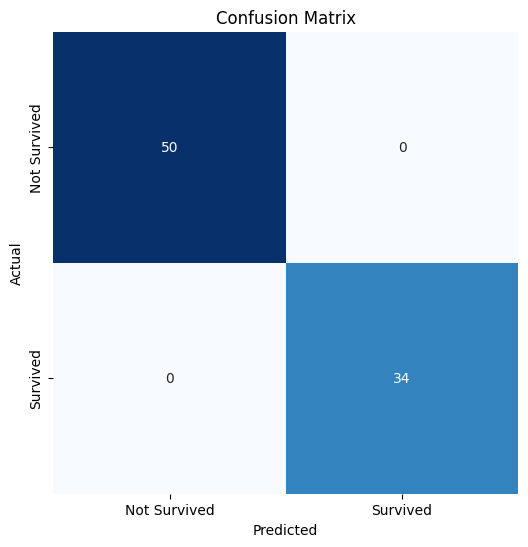

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()